In [1]:
import cv2
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import utils

## Part III

### (A)

In [2]:
cameraman_im = cv2.imread('cameraman.bmp', cv2.IMREAD_GRAYSCALE)

#### Noises

The _add_salt_and_pepper_noise_ function takes an input image and a noise amount between 0 and 1 as parameters. It first creates a copy of the input image, and then computes the number of pixels to be affected by the noise based on the noise amount. It generates a random set of pixel indices to be modified and sets the pixel values at those indices to either 0 or 255. Finally, it returns the noisy image.

The _add_gaussian_noise_ function takes an input image and the mean and standard deviation of the Gaussian distribution as parameters. It first creates a copy of the input image and generates Gaussian noise with the specified mean and standard deviation using np.random.normal(). It then adds the Gaussian noise to the image by converting the pixel values to float32, adding the noise, and clipping the resulting pixel values to the range [0, 255]. 

In [3]:
def add_salt_and_pepper_noise(image, amount):
    """
    Applies Salt & Pepper noise to an image.

    Parameters:
    image (numpy.ndarray): The input image.
    amount (float): The amount of noise to add to the image, in the range [0, 1].

    Returns:
    numpy.ndarray: The noisy image.
    """
    # Create a copy of the input image
    noisy_image = np.copy(image)

    # Compute the number of pixels to be affected by the noise
    num_pixels = int(amount * image.shape[0] * image.shape[1])

    # Generate a random set of pixel indices
    indices = np.random.choice(image.size, num_pixels, replace=False)

    # Set the pixel values at the selected indices to either 0 or 255
    noisy_image.flat[indices] = np.random.choice([0, 255], num_pixels)

    return noisy_image


def add_gaussian_noise(image, mean=0, std=1):
    """
    Applies Gaussian noise to an image.

    Parameters:
    image (numpy.ndarray): The input image.
    mean (float): The mean of the Gaussian distribution.
    std (float): The standard deviation of the Gaussian distribution.

    Returns:
    numpy.ndarray: The noisy image.
    """
    # Create a copy of the input image
    noisy_image = np.copy(image)

    # Generate Gaussian noise with the specified mean and standard deviation
    gaussian_noise = np.random.normal(mean, std, image.shape)

    # Add the Gaussian noise to the image
    noisy_image = noisy_image.astype(np.float32) + gaussian_noise

    # Clip the pixel values to the range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    # Convert the pixel values back to integers
    noisy_image = noisy_image.astype(np.uint8)

    return noisy_image

#### Creating noisy images

In this section we added noise to cameraman image and plotted different noisy images we made using cameraman as base image.

In [4]:
cameraman_sp_noise_1 = add_salt_and_pepper_noise(cameraman_im, 0.01)
cameraman_sp_noise_4 = add_salt_and_pepper_noise(cameraman_im, 0.04)

cameraman_g_noise_1 = add_gaussian_noise(cameraman_im, std=1)
cameraman_g_noise_5 = add_gaussian_noise(cameraman_im, std=5)

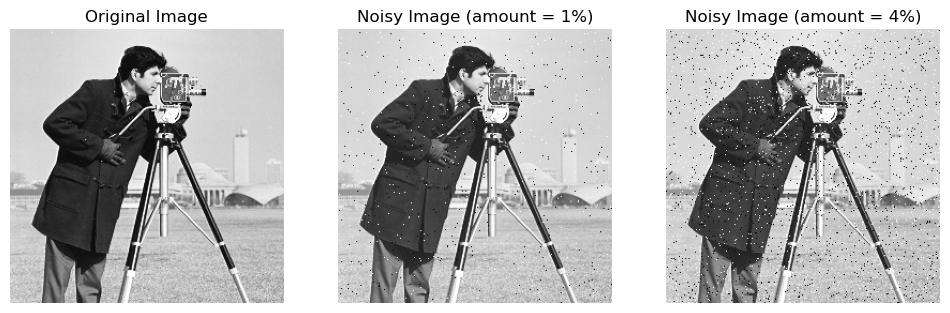

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].imshow(cameraman_im, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(cameraman_sp_noise_1, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image (amount = 1%)')

axs[2].imshow(cameraman_sp_noise_4, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Noisy Image (amount = 4%)')

# Show the plot
plt.show()

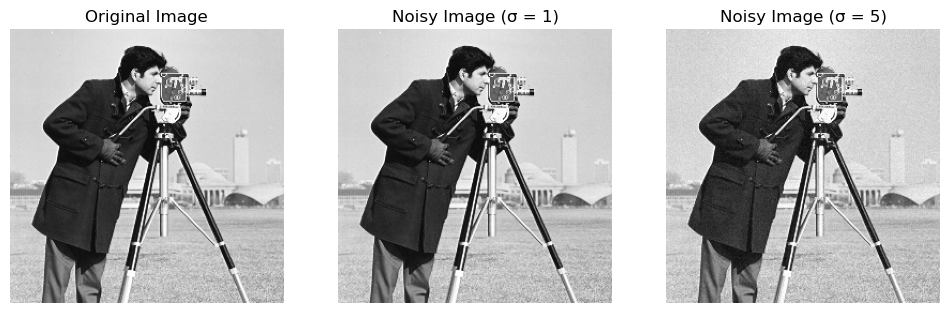

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].imshow(cameraman_im, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(cameraman_g_noise_1, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image (σ = 1)')

axs[2].imshow(cameraman_g_noise_5, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Noisy Image (σ = 5)')

# Show the plot
plt.show()

#### Filters

To apply arithmetic mean filter we implemented _apply_arithmetic_mean_filter_ function. It involves taking a sliding window over the image and replacing the value of each pixel with the average of the pixel values in the window. The size of the window determines the amount of blurring applied to the image. 

And for median filter, the apply_median_filter function takes an input image and a kernel size as parameters, and applies a median filter to the image using the specified kernel size. The median filter is a non-linear filter that replaces each pixel in the image with the median value of the neighboring pixels within the kernel. This helps to reduce noise and preserve edges in the image.

In [7]:
def apply_arithmetic_mean_filter(image, kernel_size):
    """
    Applies an Arithmetic mean filter to an image using a sliding window approach.

    Parameters:
    image (numpy.ndarray): The input image.
    kernel_size (int): The size of the kernel (must be an odd integer).

    Returns:
    numpy.ndarray: The filtered image.
    """
    # Define the kernel as a square matrix of ones with the specified size
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)

    # Apply the filter using a sliding window approach
    filtered_image = np.zeros_like(image)
    border_size = kernel_size // 2
    padded_image = np.pad(image, ((border_size, border_size), (border_size, border_size)), mode='constant')
    for i in range(border_size, padded_image.shape[0] - border_size):
        for j in range(border_size, padded_image.shape[1] - border_size):
            window = padded_image[i - border_size:i + border_size + 1, j - border_size:j + border_size + 1]
            filtered_image[i - border_size, j - border_size] = np.sum(window * kernel)

    return filtered_image

def apply_median_filter(image, kernel_size):
    """
    Applies a Median filter to an image using a sliding window approach.

    Parameters:
    image (numpy.ndarray): The input image.
    kernel_size (int): The size of the kernel (must be an odd integer).

    Returns:
    numpy.ndarray: The filtered image.
    """
    # Apply the filter using a sliding window approach
    filtered_image = np.zeros_like(image)
    border_size = kernel_size // 2
    padded_image = np.pad(image, ((border_size, border_size), (border_size, border_size)), mode='constant')
    for i in range(border_size, padded_image.shape[0] - border_size):
        for j in range(border_size, padded_image.shape[1] - border_size):
            window = padded_image[i - border_size:i + border_size + 1, j - border_size:j + border_size + 1]
            median = np.median(window)
            filtered_image[i - border_size, j - border_size] = median

    return filtered_image

#### Metrics

We implemeted SSIM and PSNR metrics to compare the results later. For the ssim metric we used _structural_similarity_ from skimage.metrics.

In [8]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(img1, img2):
    """
    Calculates the Structural Similarity Index (SSIM) between two images.

    Parameters:
    img1 (numpy.ndarray): The first input image.
    img2 (numpy.ndarray): The second input image.

    Returns:
    float: The SSIM value between the two images.
    """
    # Normalize the images to the range [0, 1]
    img1 = img1.astype('float') / 255.0
    img2 = img2.astype('float') / 255.0

    # Calculate the SSIM
    ssim_value = ssim(img1, img2, data_range=img2.max() - img2.min())

    return ssim_value

def calculate_psnr(img1, img2, max_pixel=255):
    """
    Calculates the Peak Signal-to-Noise Ratio (PSNR) between two images.

    Parameters:
    img1 (numpy.ndarray): The first input image.
    img2 (numpy.ndarray): The second input image.
    max_pixel (int): The maximum pixel value (default: 255).

    Returns:
    float: The PSNR value between the two images.
    """
    # Compute the mean squared error between the two images
    mse = np.mean((img1 - img2) ** 2)

    # If the MSE is zero, the images are identical, so return infinity
    if mse == 0:
        return float('inf')

    # Compute the PSNR value using the maximum pixel value and the MSE
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))

    return psnr_value

def report_metrics(im_filter, im_org, im_noisy):
    table = PrettyTable()
    table.field_names = ['', 'Before', 'After']
    table.add_row(['SSIM', np.round(calculate_ssim(im_org, im_noisy), 2), \
                np.round(calculate_ssim(im_org, im_filter), 2)])
    table.add_row(['PSNR', np.round(calculate_psnr(im_org, im_noisy), 2), \
                np.round(calculate_psnr(im_org, im_filter), 2)])
    print(table)

#### Applying filters to images

##### Arithmetic mean filter

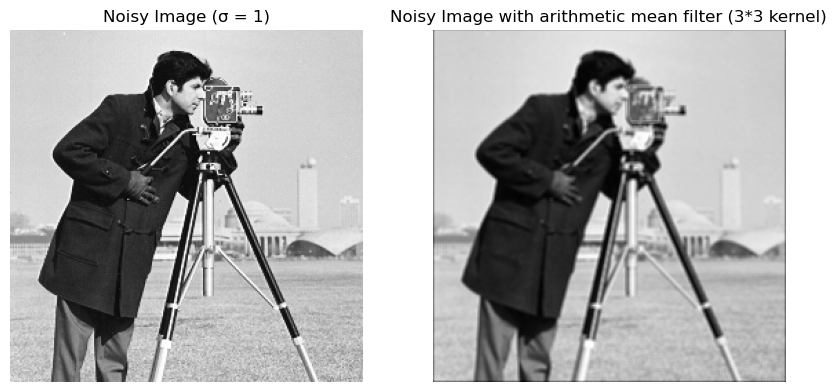

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.99  |  0.8  |
| PSNR | 46.91  | 32.54 |
+------+--------+-------+


In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_g_noise_1, kernel_size=3)

axs[0].imshow(cameraman_g_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 1)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_1)

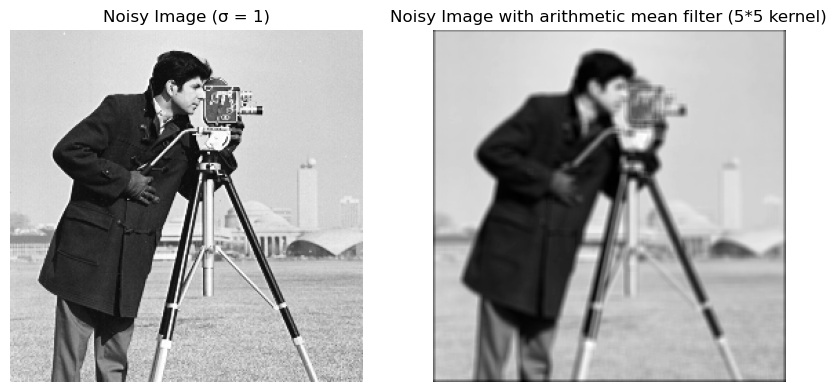

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.99  |  0.66 |
| PSNR | 46.91  | 31.45 |
+------+--------+-------+


In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_g_noise_1, kernel_size=5)

axs[0].imshow(cameraman_g_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 1)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_1)

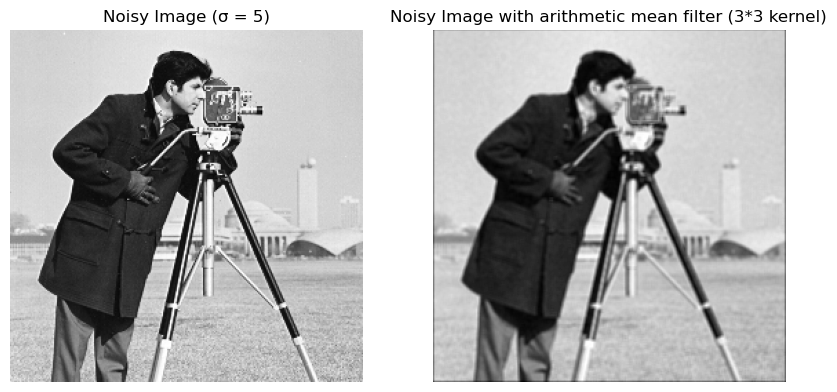

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.86  |  0.78 |
| PSNR |  34.2  | 32.34 |
+------+--------+-------+


In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_g_noise_5, kernel_size=3)

axs[0].imshow(cameraman_g_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 5)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_5)

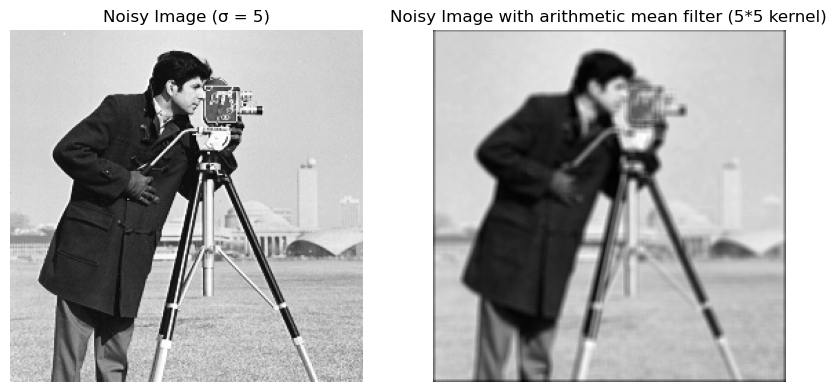

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.86  |  0.66 |
| PSNR |  34.2  | 31.38 |
+------+--------+-------+


In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_g_noise_5, kernel_size=5)

axs[0].imshow(cameraman_g_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 5)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_5)

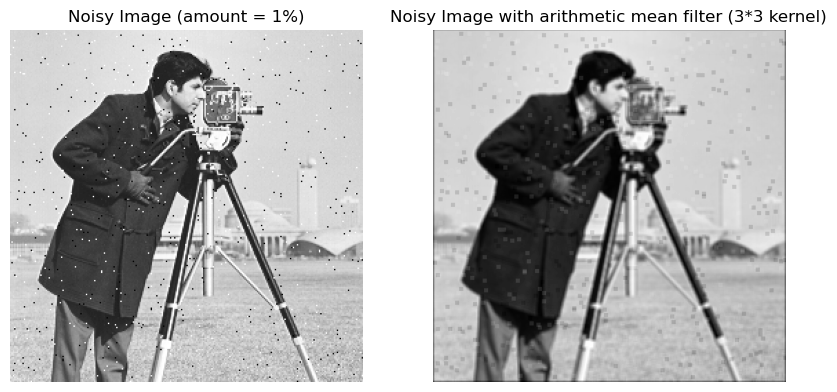

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.81  |  0.71 |
| PSNR | 47.33  |  32.1 |
+------+--------+-------+


In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_sp_noise_1, kernel_size=3)

axs[0].imshow(cameraman_sp_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 1%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_1)

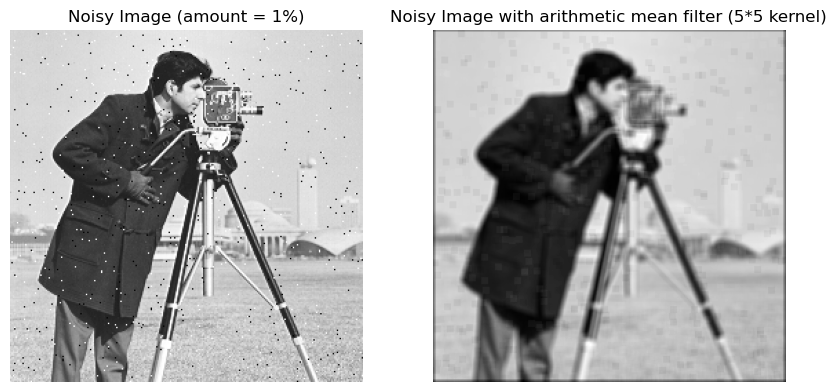

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.81  |  0.62 |
| PSNR | 47.33  | 31.01 |
+------+--------+-------+


In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_sp_noise_1, kernel_size=5)

axs[0].imshow(cameraman_sp_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 1%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_1)

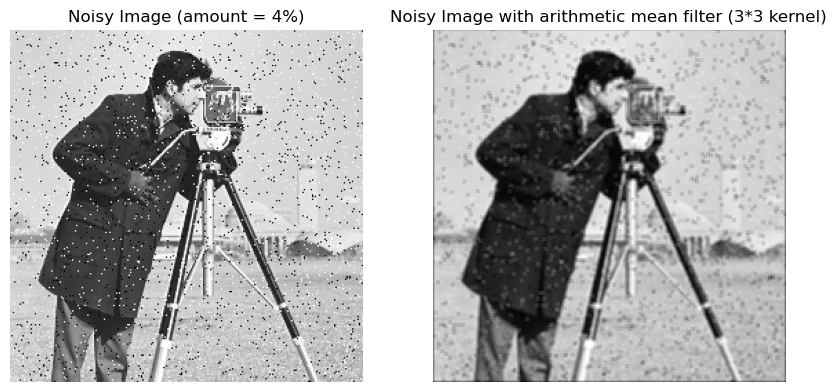

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.5   |  0.55 |
| PSNR | 41.31  | 31.04 |
+------+--------+-------+


In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_sp_noise_4, kernel_size=3)

axs[0].imshow(cameraman_sp_noise_4, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 4%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_4)

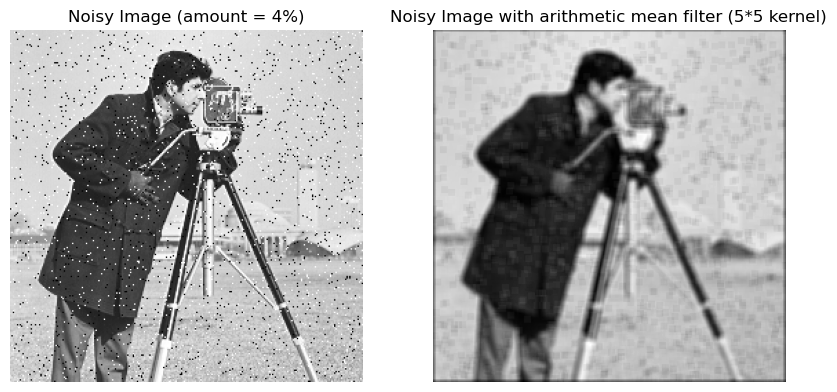

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.5   |  0.54 |
| PSNR | 41.31  | 30.21 |
+------+--------+-------+


In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_arithmetic_mean_filter(cameraman_sp_noise_4, kernel_size=5)

axs[0].imshow(cameraman_sp_noise_4, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 4%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Noisy Image with arithmetic mean filter (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_4)

##### Median filter

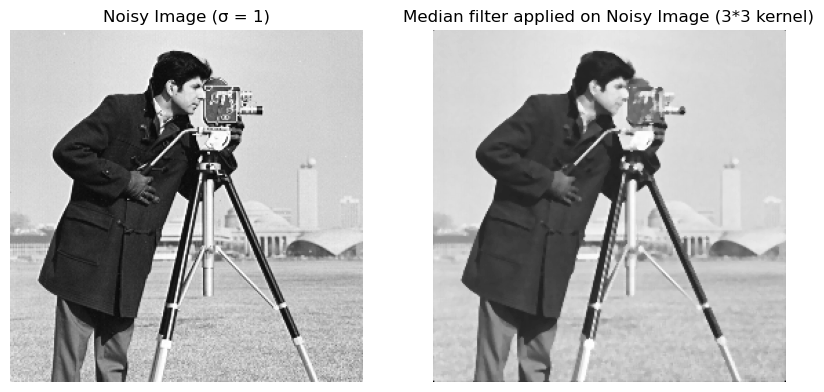

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.99  |  0.85 |
| PSNR | 46.91  | 34.34 |
+------+--------+-------+


In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_g_noise_1, kernel_size=3)

axs[0].imshow(cameraman_g_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 1)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_1)

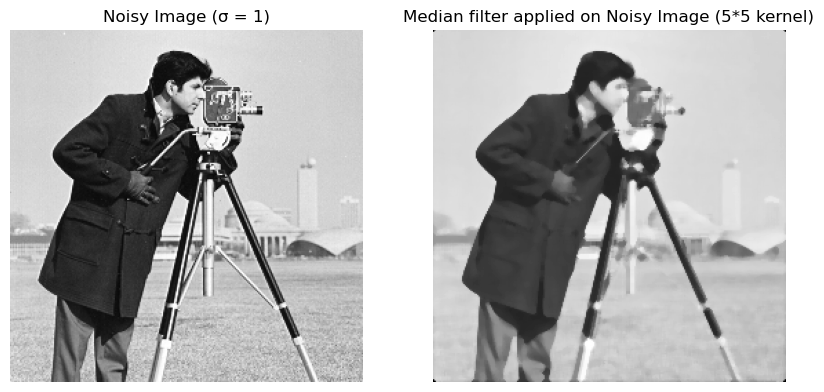

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.99  |  0.75 |
| PSNR | 46.91  | 33.01 |
+------+--------+-------+


In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_g_noise_1, kernel_size=5)

axs[0].imshow(cameraman_g_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 1)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_1)

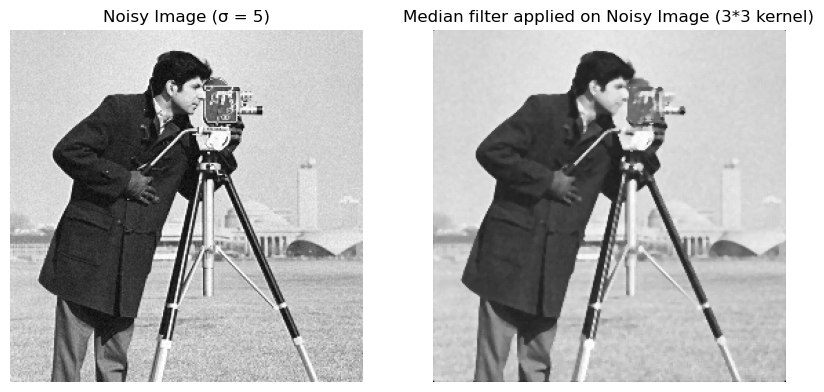

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.86  |  0.82 |
| PSNR |  34.2  | 33.48 |
+------+--------+-------+


In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_g_noise_5, kernel_size=3)

axs[0].imshow(cameraman_g_noise_5, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 5)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_5)

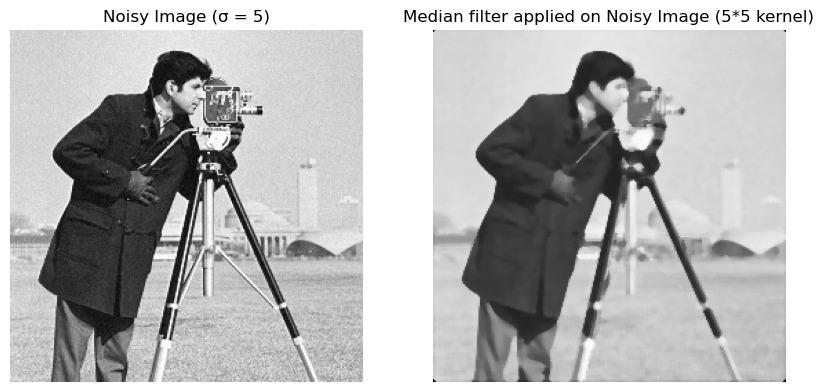

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.86  |  0.74 |
| PSNR |  34.2  | 32.59 |
+------+--------+-------+


In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_g_noise_5, kernel_size=5)

axs[0].imshow(cameraman_g_noise_5, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (σ = 5)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_g_noise_5)

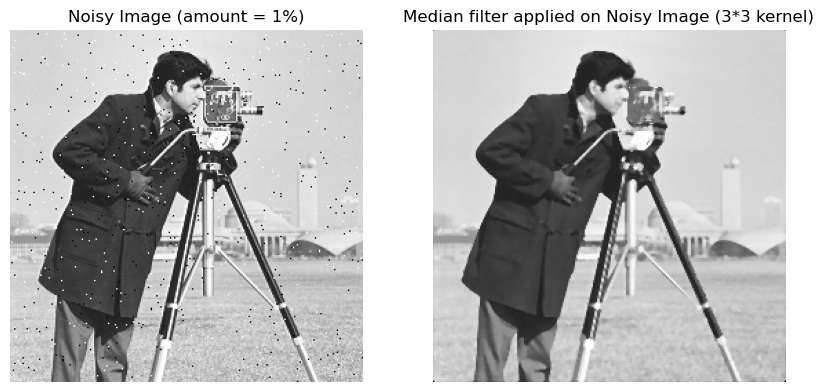

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.81  |  0.85 |
| PSNR | 47.33  |  34.4 |
+------+--------+-------+


In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_sp_noise_1, kernel_size=3)

axs[0].imshow(cameraman_sp_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 1%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_1)

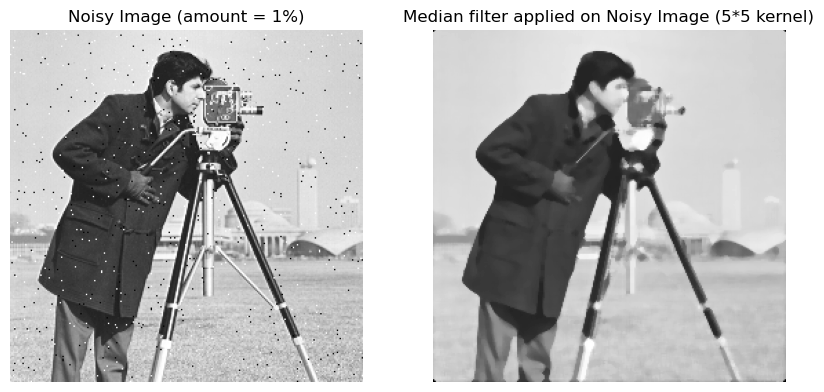

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.81  |  0.75 |
| PSNR | 47.33  | 33.04 |
+------+--------+-------+


In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_sp_noise_1, kernel_size=5)

axs[0].imshow(cameraman_sp_noise_1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 1%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_1)

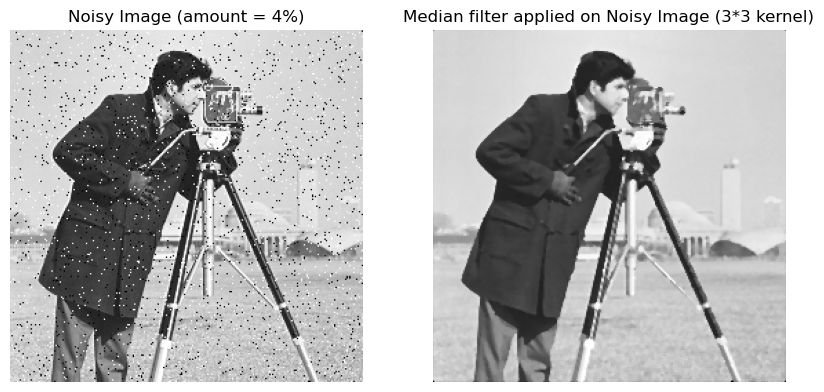

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.5   |  0.85 |
| PSNR | 41.31  | 34.25 |
+------+--------+-------+


In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_sp_noise_4, kernel_size=3)

axs[0].imshow(cameraman_sp_noise_4, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 4%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (3*3 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_4)

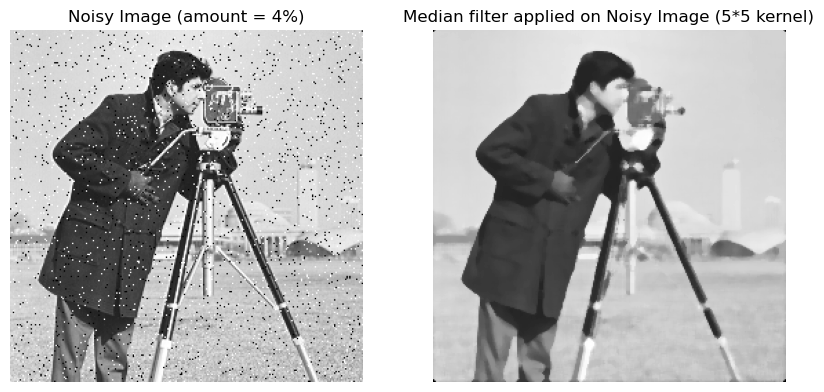

+------+--------+-------+
|      | Before | After |
+------+--------+-------+
| SSIM |  0.5   |  0.75 |
| PSNR | 41.31  | 32.95 |
+------+--------+-------+


In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_filter = apply_median_filter(cameraman_sp_noise_4, kernel_size=5)

axs[0].imshow(cameraman_sp_noise_4, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Noisy Image (amount = 4%)')

axs[1].imshow(im_filter, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Median filter applied on Noisy Image (5*5 kernel)')

# Show the plot
plt.show()

report_metrics(im_filter, cameraman_im, cameraman_sp_noise_4)

#### Conclusion

Median filter much better in case of these noisy images in compare to Arithmetic mean filter both visually and according to PSNR & SSIM metrics. It is worth mentioning that is worked much better in case of images containing salt and pepper noises.

### (B) - I

In [25]:
def im_show(org, org_spect, modified, mod_spect, title=""):
    # Create a figure with three subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    fig.suptitle(title, fontsize=12, fontweight="bold")

    # Plot the original image
    axs[0, 0].imshow(org, cmap='gray')
    axs[0, 0].set_title('Before (Original)', fontsize=10)
    axs[0, 0].axis('off')

    # Plot the Fourier transform
    axs[0, 1].imshow(modified, cmap='gray')
    axs[0, 1].set_title("After", fontsize=10)
    axs[0, 1].axis('off')

    # Plot the Fourier transform
    axs[1, 0].imshow(20 * np.log(1 + org_spect), cmap='gray')
    axs[1, 0].set_title("Original Spectrum", fontsize=10)
    axs[1, 0].axis('off')

    # Plot the Fourier transform
    axs[1, 1].imshow(20 * np.log(1 + mod_spect), cmap='gray')
    axs[1, 1].set_title("Filtered Spectrum", fontsize=10)
    axs[1, 1].axis('off')

    # Show the plot
    plt.tight_layout()

In [26]:
img = cv2.imread('lenna.tif')
gray_lenna = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lenna_ft = np.fft.fft2(gray_lenna)

# Shift the zero frequency component to the center of the spectrum
lenna_ft_shifted = np.fft.fftshift(lenna_ft)

# Calculate the magnitude and phase angle of the spectrum
lenna_spectrum = utils.abs(lenna_ft_shifted)
lenna_phase = np.angle(lenna_ft_shifted)

#### Ideal low-pass filter

Ideal lowpass filter is a frequency domain filter that is used to remove high-frequency content from an image while keeping low-frequency content intact. It is based on the ideal lowpass filter function, which is a mathematical function that passes all frequencies below a certain cutoff frequency and attenuates all frequencies above it.

In image processing, the ideal lowpass filter is applied in the frequency domain by multiplying the Fourier transform of an image with the ideal lowpass filter function. This process results in a filtered image that has had high-frequency components removed.

However, the ideal lowpass filter has some drawbacks, such as producing ringing artifacts and being sensitive to noise. Therefore, it is not commonly used in practice, and other types of filters, such as Gaussian and Butterworth filters, are preferred.

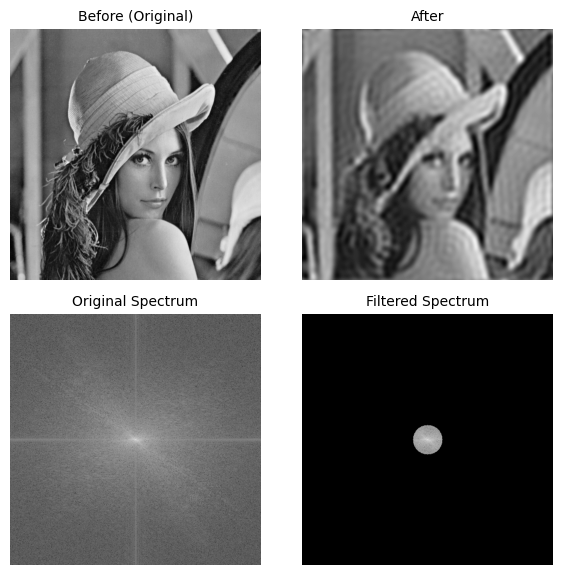

In [27]:
# Create an ideal low-pass filter
def ideal_lowpass_filter(img_shape, radius):
    P, Q = img_shape
    u, v = np.meshgrid(np.arange(Q), np.arange(P))
    dist = np.sqrt((u - Q/2)**2 + (v - P/2)**2)
    H = (dist <= radius).astype(int)
    return H

# Apply the ideal low-pass filter to the grayscale image
ilp_filter = ideal_lowpass_filter(gray_lenna.shape, 30)

# Apply the filter to the magnitude spectrum 
filtered_spectrum = lenna_spectrum * ilp_filter

reconstructed_img = filtered_spectrum * np.exp(1j * lenna_phase)
reconstructed_img = utils.abs(np.fft.ifft2(reconstructed_img))

im_show(gray_lenna, lenna_spectrum, reconstructed_img, filtered_spectrum)

#### Gaussian low-pass filter

Gaussian low-pass filter is a type of linear filter used in image processing to reduce the high-frequency components of an image. The filter is applied in the frequency domain by convolving the Fourier Transform of the image with a Gaussian function. The Gaussian function is used as the weighting function for the filter, where the center of the Gaussian function corresponds to the low-frequency components of the image.

The filter has a smoothing effect on the image and reduces the high-frequency noise, while preserving the low-frequency components. The amount of smoothing applied to the image can be controlled by adjusting the standard deviation of the Gaussian function.

In summary, Gaussian low-pass filter is a type of frequency domain filter used to remove high-frequency noise from an image while preserving its low-frequency content.

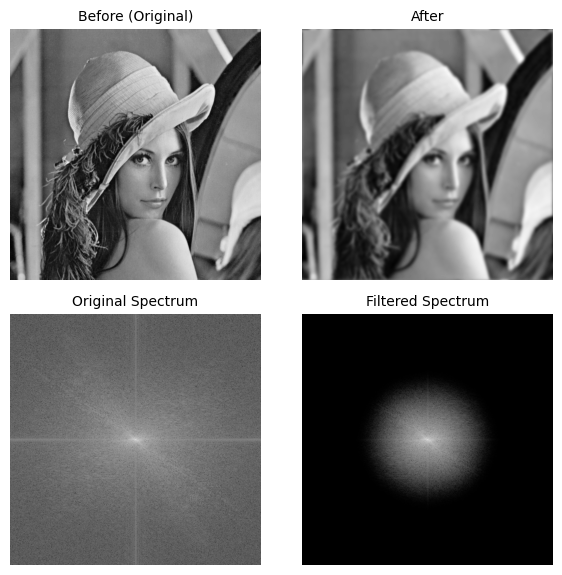

In [28]:
# Create a Gaussian low-pass filter
def gaussian_lowpass_filter(img_shape, radius):
    P, Q = img_shape
    u, v = np.meshgrid(np.arange(Q), np.arange(P))
    Duv = (u - Q/2)**2 + (v - P/2)**2
    H = np.exp(-Duv / (2*radius**2))
    return H

# Apply the Gaussian low-pass filter to the grayscale image
glp_filter = gaussian_lowpass_filter(gray_lenna.shape, 30)

# Apply the filter to the magnitude spectrum 
filtered_spectrum = lenna_spectrum * glp_filter

reconstructed_img = filtered_spectrum * np.exp(1j * lenna_phase)
reconstructed_img = utils.abs(np.fft.ifft2(reconstructed_img))

im_show(gray_lenna, lenna_spectrum, reconstructed_img, filtered_spectrum)

#### Ideal high-pass filter

The ideal high-pass filter is a frequency domain filter that attenuates all the frequencies below a cut-off frequency (called the high-frequency components) and passes all the frequencies above the cut-off frequency (called the low-frequency components). The cut-off frequency is chosen by the user based on the requirements of the application. The filter has a sharp transition between the passband and stopband, resulting in ringing artifacts in the output image. The ideal high-pass filter is defined as follows in the frequency domain:

$$ H(u,v) =
\begin{cases}
& 0, d(u,v) \leq r \\
& 1, d(u,v) > r \\
\end{cases} $$

where $d(u,v)$ is the distance between the point $(u,v)$ and the center of the frequency domain, and $r$ is the cut-off frequency (radius).

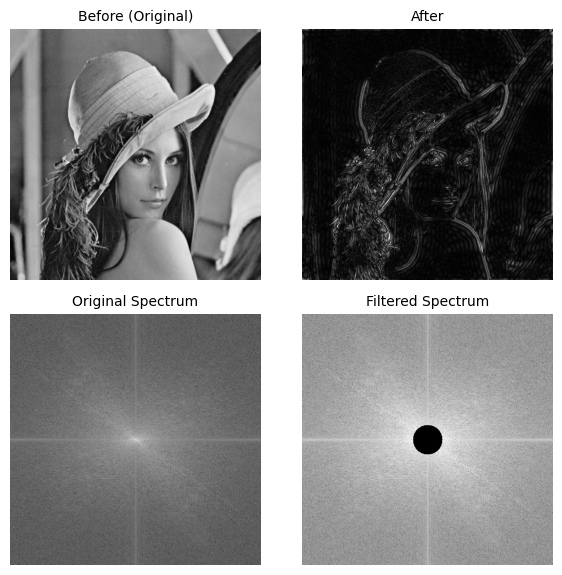

In [29]:
# Create an ideal high-pass filter
def ideal_highpass_filter(img_shape, radius):
    P, Q = img_shape
    u, v = np.meshgrid(np.arange(Q), np.arange(P))
    dist = np.sqrt((u - Q/2)**2 + (v - P/2)**2)
    H = (dist > radius).astype(int)
    return H

# Apply the ideal high-pass filter to the grayscale image
ihp_filter = ideal_highpass_filter(gray_lenna.shape, 30)

# Apply the filter to the magnitude spectrum 
filtered_spectrum = lenna_spectrum * ihp_filter

reconstructed_img = filtered_spectrum * np.exp(1j * lenna_phase)
reconstructed_img = utils.abs(np.fft.ifft2(reconstructed_img))

im_show(gray_lenna, lenna_spectrum, reconstructed_img, filtered_spectrum)

#### Conclusion

##### What are the uses of each of the above filters?

1. Ideal low-pass filter: This filter is used to remove high frequency components (i.e., noise) from an image, while retaining the low frequency components (i.e., important information such as edges and shapes). It is characterized by a sharp cut-off frequency in the frequency domain, and is ideal for images with uniform backgrounds and distinct edges.

2. Gaussian low-pass filter: This filter is similar to the ideal low-pass filter, but has a smoother transition from low to high frequencies. It is characterized by a Gaussian function in the frequency domain, and is effective in removing noise while preserving edges and details in the image. It is a good choice for images with gradual changes in intensity.

3. Ideal high-pass filter: This filter is used to remove low frequency components (i.e., smoothing) from an image, while retaining the high frequency components (i.e., edges and details). It is characterized by a sharp cut-off frequency in the frequency domain, and is ideal for images with noisy backgrounds and important details.

##### What is the significant difference between the results of ideal and Gaussian lowpass filters? And why this happened?

The significant difference between the results of ideal and Gaussian lowpass filters is that the ideal lowpass filter has a sharper cutoff in the frequency domain, resulting in a more abrupt transition between the passband and the stopband. On the other hand, the Gaussian lowpass filter has a more gradual transition between the passband and the stopband.

This difference occurs because the ideal lowpass filter has an ideal rectangular shape in the frequency domain, which results in a sinc function in the spatial domain. The sinc function has oscillations that can cause ringing artifacts in the filtered image. In contrast, the Gaussian lowpass filter has a smooth bell-shaped frequency response, which results in a Gaussian function in the spatial domain. The Gaussian function has no oscillations, which results in a smoother filtered image with no ringing artifacts.

Therefore, the choice between ideal and Gaussian lowpass filters depends on the specific application and the desired trade-off between sharpness of the cutoff and smoothness of the filtered image.

### (B) - II

The noise on this images seems to be uniform or maybe periodic noise.

For an image with uniform noise, a median filter can be a good option to reduce the noise while preserving the edges and details of the image. The median filter replaces each pixel in the image with the median of the neighboring pixel values in the filter kernel. It is effective in removing impulse noise, such as salt and pepper noise, and uniform noise, as it does not depend on the specific distribution of the noise. However, it may not be as effective in removing other types of noise, such as Gaussian noise.

A bandpass filter can be useful for removing specific frequency ranges of noise, such as periodic noise that is concentrated within a certain frequency band. By filtering out these frequencies, the noise can be effectively removed while leaving the rest of the image intact. However, bandpass filtering can also lead to some loss of detail or blurring in the image, depending on the filter parameters and the strength of the noise. So, it is important to carefully choose the filter parameters to balance noise reduction with preservation of important image features.

In [30]:
def bandpass_filter(img_shape, low_freq, high_freq):
    rows, cols = img_shape
    mask = np.ones((rows, cols), np.float32)

    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if low_freq <= dist <= high_freq:
                mask[i, j] = 0

    return mask

def simple_custom_mask(img_shape):
    rows, cols = img_shape
    mask = np.ones((rows, cols), np.float32)
    
    mask[43:50,70:90] = 0
    mask[147:155,70:90] = 0
    
    mask[97:100,0:120] = 0
    mask[97:100,140:-1] = 0

    mask[0:85,128:132] = 0
    mask[115:-1,128:132] = 0

    mask[43:50,170:190] = 0
    mask[147:155,170:190] = 0

    
    mask[45:48, 0:-1] = 0
    mask[-48:-45, 0:-1] = 0
    mask[0:-1, 3:6] = 0
    mask[0:-1, -6:-3] = 0

    return mask

def godlike_custom_mask(img_shape):
    rows, cols = img_shape
    mask = np.ones((rows, cols), np.float32)
    
    mask[43:50,70:90] = 0
    mask[147:155,70:90] = 0
    
    mask[97:100,0:120] = 0
    mask[97:100,140:-1] = 0

    mask[0:85,128:132] = 0
    mask[-85:-1,128:132] = 0

    mask[43:50,170:190] = 0
    mask[147:155,170:190] = 0

    
    mask[0:-1, 3:6] = 0
    mask[0:-1, 76:80] = 0
    mask[0:-1, 55:57] = 0
    mask[0:-1, -57:-55] = 0
    mask[0:-1, -6:-3] = 0
    mask[0:-1, -80:-76] = 0

    
    mask[0:70, 100:102] = 0
    mask[0:70, -102:-100] = 0
    mask[-70:-1, 100:102] = 0
    mask[-70:-1, -102:-100] = 0

    mask[0:60, 87:89] = 0
    mask[0:60, -89:-87] = 0
    mask[-60:-1, -89:-87] = 0
    mask[-60:-1, 87:89] = 0

    mask[0:60, 14:17] = 0
    mask[0:60, -17:-14] = 0
    mask[-60:-1, -17:-14] = 0
    mask[-60:-1, 14:17] = 0

    mask[45:48, 0:-1] = 0
    mask[-48:-45, 0:-1] = 0

    return mask

In [31]:
land_im = cv2.imread('land.png', cv2.IMREAD_GRAYSCALE)

land_ft = np.fft.fft2(land_im)

# Shift the zero frequency component to the center of the spectrum
land_ft_shifted = np.fft.fftshift(land_ft)

# Calculate the magnitude and phase angle of the spectrum
land_spectrum = utils.abs(land_ft_shifted)
land_phase = np.angle(land_ft_shifted)

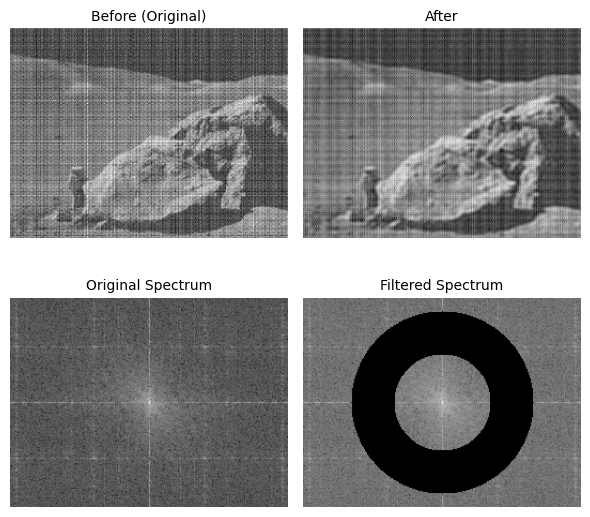

In [32]:
bp_filter = bandpass_filter(land_im.shape, 45, 85)

# Apply the filter to the magnitude spectrum 
filtered_spectrum = land_spectrum * bp_filter

filtered_img = filtered_spectrum * np.exp(1j * land_phase)
filtered_img = utils.abs(np.fft.ifft2(filtered_img))

im_show(land_im, land_spectrum, filtered_img, filtered_spectrum)

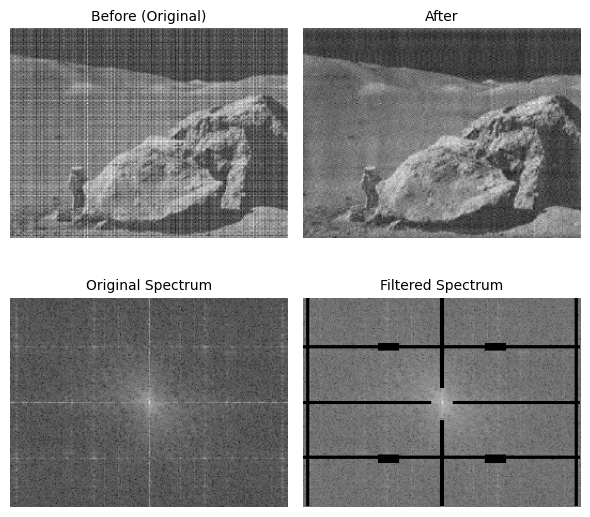

In [33]:
scm_filter = simple_custom_mask(land_im.shape)

# Apply the filter to the magnitude spectrum 
filtered_spectrum = land_spectrum * scm_filter

filtered_img = filtered_spectrum * np.exp(1j * land_phase)
filtered_img = utils.abs(np.fft.ifft2(filtered_img))

im_show(land_im, land_spectrum, filtered_img, filtered_spectrum)

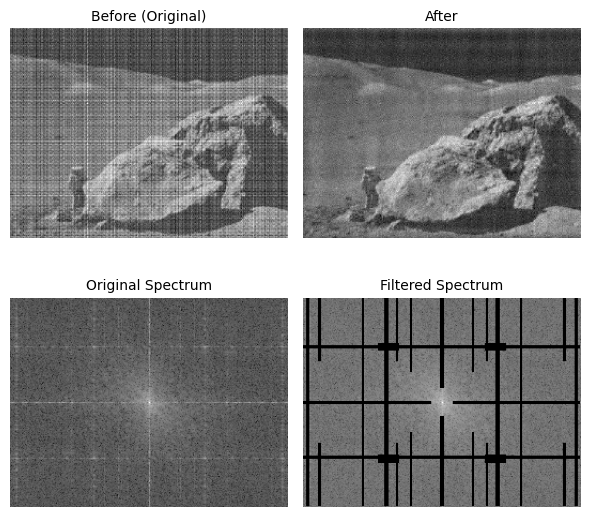

In [34]:
gcm_filter = godlike_custom_mask(land_im.shape)

# Apply the filter to the magnitude spectrum 
filtered_spectrum = land_spectrum * gcm_filter

filtered_img = filtered_spectrum * np.exp(1j * land_phase)
filtered_img = utils.abs(np.fft.ifft2(filtered_img))

im_show(land_im, land_spectrum, filtered_img, filtered_spectrum)

#### Conclusion

First we tried to apply a bandpass filter with a circular mask. Since it didn't work very well We tried to define our own custom filter mask by filtering the peaks in magnitude spectrum which are the noises. And as it can be seen in last two plots, our results was much better.

### (C)

There are several types of noise that can occur in digital images, including:

1. Gaussian noise: This type of noise is caused by random variations in the intensity of the image pixels and is often modeled as a normal distribution.

2. Salt and pepper noise: This is a type of noise that causes individual pixels in an image to become either completely white (salt) or black (pepper), typically due to errors in the image acquisition process.

3. Uniform noise: This type of noise is characterized by a constant deviation from the true pixel value and can occur due to errors in the image acquisition or processing pipeline.

4. Periodic noise: This type of noise is characterized by repeating patterns in the image and can occur due to issues with the image acquisition process, such as vibration or interference.

5. Speckle noise: This type of noise is often found in images acquired using ultrasound or radar and is caused by interference patterns between the transmitted and received signals.

6. Poisson noise: This type of noise is often found in images acquired using low-light cameras and is caused by the statistical fluctuations in the number of photons detected by the camera.

#### Noise Identification

Salt and pepper noise is a type of image noise that adds white and black pixels randomly throughout the image, which can cause image degradation and loss of details. The idea behind the function above is to identify the presence of salt and pepper noise in an image by calculating the fraction of noisy pixels in the image. By counting the number of pixels that are either completely black (0) or completely white (255), the function can calculate the fraction of noisy pixels in the image. If this fraction exceeds the specified threshold, it indicates that the image contains salt and pepper noise.

In [35]:
def identify_salt_pepper_noise(img, threshold=0.05):
    """
    Identifies salt and pepper noise in an image.
    
    Parameters:
        img (numpy.ndarray): Input grayscale image.
        threshold (float): Threshold value for identifying noisy pixels. Default is 0.05.
        
    Returns:
        (bool): True if salt and pepper noise is detected, False otherwise.
    """
    # Convert image to grayscale if needed
    if len(img.shape) > 2:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
        
    # Calculate the number of noisy pixels
    noisy_pixels = np.sum((img == 0) | (img == 255))
    
    # Calculate the fraction of noisy pixels
    noisy_fraction = noisy_pixels / img.size
    
    # Compare the fraction of noisy pixels to the threshold
    return (noisy_fraction > threshold)

Uniform noise refers to a type of noise that has a constant intensity level across the image, as opposed to other types of noise like Gaussian noise or salt and pepper noise, which have varying intensity levels across the image.

The function calculates the standard deviation and mean of the input image and then calculates the coefficient of variation, which is the ratio of the standard deviation to the mean. If the coefficient of variation is less than a certain threshold value, it is assumed that the image contains uniform noise. The threshold value is specified by the threshold parameter and has a default value of 0.05.

In [36]:
def identify_uniform_noise(image, threshold=0.05):
    """
    This function takes an input image and a threshold value and returns 
    True if the image contains uniform noise and False otherwise. 

    Parameters:
        image (numpy.ndarray): Input image
        threshold (float): Threshold value to determine if the image 
                           contains uniform noise (default=0.05)
    
    Returns:
        bool: True if the image contains uniform noise, False otherwise
    """
    # Convert image to grayscale if needed
    if len(img.shape) > 2:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    # Calculate the standard deviation of the image
    std_dev = np.std(gray)
    
    # Calculate the mean of the image
    mean = np.mean(gray)
    
    # Calculate the coefficient of variation
    cv = std_dev / mean
    
    return (cv < threshold)

Identifying Gaussian noise through Fourier transform can be more challenging compared to identifying periodic noise. This is because Gaussian noise is a random noise, and its frequency components are distributed uniformly across the spectrum. Therefore, there is no clear indication of periodicity in the frequency domain.

One approach to identifying Gaussian noise is to analyze the spectrum of the image and look for certain characteristics that are consistent with Gaussian noise. For example, Gaussian noise tends to have a relatively flat power spectrum. So, if an image has a spectrum with high energy in the low-frequency range and a relatively flat power spectrum in the high-frequency range, it is likely that the image contains Gaussian noise. However, this method may not always be reliable and can also produce false positives.

The function above first converts the input image to grayscale if it is not already in grayscale. Then it computes the Fourier transform of the image and shifts the zero frequency component to the center of the spectrum. The magnitude spectrum of the shifted Fourier spectrum is then computed and the mean and standard deviation of the magnitude spectrum are calculated. A threshold for the magnitude spectrum is defined as the mean plus three times the standard deviation. Then the function counts the number of pixels in the magnitude spectrum above the threshold and computes the ratio of the number of pixels above the threshold to the total number of pixels. If this ratio is above a certain threshold, then the image is considered to contain Gaussian noise. If the ratio is below the threshold, the image is considered to not contain Gaussian noise.

In [37]:
def identify_gaussian_noise(img, threshold=0.05):
    # Convert image to grayscale if needed
    if len(img.shape) > 2:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Compute the Fourier transform of the image
    f = np.fft.fft2(gray)
    
    # Shift the zero frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    
    # Compute the magnitude spectrum
    magnitude_spectrum = 20*np.log(utils.abs(fshift))
    
    # Compute the mean and standard deviation of the magnitude spectrum
    mean_spectrum = np.mean(magnitude_spectrum)
    std_spectrum = np.std(magnitude_spectrum)
    
    # Define a threshold for the magnitude spectrum
    ms_threshold = mean_spectrum + 3*std_spectrum
    
    # Count the number of pixels in the spectrum above the threshold
    num_pixels_above_threshold = np.sum(magnitude_spectrum > ms_threshold)
    
    # Compute the ratio of the number of pixels above the threshold to the total number of pixels
    ratio_above_threshold = num_pixels_above_threshold / magnitude_spectrum.size
    
    # If the ratio is above a certain threshold, the image contains Gaussian noise
    if ratio_above_threshold > threshold:
        return True
    else:
        return False

We also implemented another method to identify gaussian noise in _identify_gaussian_noise_laplacian_ function. The idea behind _identify_gaussian_noise_laplacian_ function is to detect the presence of Gaussian noise in an image by calculating the Laplacian of the image and then calculating the variance of the Laplacian. The Laplacian of an image is a measure of its second derivative, which highlights regions of rapid intensity changes. Gaussian noise tends to have a high frequency content and therefore causes rapid changes in intensity, resulting in a high variance in the Laplacian of the image. The function computes a threshold for the variance of the Laplacian based on the size of the image and the standard deviation of the Laplacian, and then compares the variance of the Laplacian to this threshold. If the variance of the Laplacian is above the threshold, the function determines that the image contains Gaussian noise.

In [38]:
def identify_gaussian_noise_laplacian(img, threshold=0.05):
    """
    This function takes an image as input and returns a boolean value indicating whether the image 
    contains Gaussian noise or not. The function first computes the Laplacian of the image and 
    then calculates the variance of the Laplacian. If the variance is above a threshold value, 
    the image is considered to have Gaussian noise.
    
    Args:
        img: The input image.
        threshold: The threshold value for variance of Laplacian. Default is 0.05.
        
    Returns:
        A boolean value indicating whether the image contains Gaussian noise or not.
    """
    # Convert image to grayscale if needed
    if len(img.shape) > 2:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Compute Laplacian
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    
    # Compute variance of Laplacian
    var = np.var(laplacian)
    
    # Compute threshold for variance of Laplacian
    h, w = gray.shape[:2]
    th = (2.0 * np.sqrt(2.0) * np.std(laplacian))**2 / (h*w)
    
    # Check if variance of Laplacian is above threshold
    return (var > th * threshold)

We used standard deviation and mean of magnitude spectrum to detect priodic noise. The idea behind this approach is that periodic noise will have a distinctive pattern in the Fourier Transform, which can be detected by looking at the standard deviation and mean of the magnitude spectrum. If the ratio of the standard deviation to the mean is high, then there is likely a periodic pattern in the image. The threshold value can be adjusted to control the sensitivity of the detection.

In [39]:
def identify_periodic_noise(img, threshold=0.5):
    """
    This function uses Fourier transform to determine whether an image contains periodic noise or not.

    Parameters:
        img (numpy.ndarray): The input image.
        threshold (float): The threshold value to determine whether the image contains periodic noise or not. Default is 0.5.

    Returns:
        bool: True if the image contains periodic noise, False otherwise.
    """
    # Convert image to grayscale if needed
    if len(img.shape) > 2:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Compute the 2D Fourier Transform of the image
    f = np.fft.fft2(gray)
    
    # Shift the zero-frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    
    # Compute the magnitude spectrum of the Fourier Transform
    magnitude_spectrum = 20 * np.log(utils.abs(fshift))
    
    # Compute the mean of the magnitude spectrum
    mean_magnitude_spectrum = np.mean(magnitude_spectrum)
    
    # Compute the standard deviation of the magnitude spectrum
    std_magnitude_spectrum = np.std(magnitude_spectrum)
    
    # Compute the ratio of the standard deviation to the mean
    ratio = std_magnitude_spectrum / mean_magnitude_spectrum
    
    # If the ratio is greater than the threshold, the image contains periodic noise
    # Otherwise, the image does not contain periodic noise
    return (ratio > threshold)

In [40]:
table = PrettyTable()
table.title = '\033[93mCammeraman (1% salt & papper noise)\033[0m'
table.field_names = ['Noise type', 'Status']
table.add_row(['Gaussian (Fourier Transform)', '✔️' if identify_gaussian_noise(cameraman_sp_noise_1, 0.01) else '❌'])
table.add_row(['Gaussian (Laplacian)', '✔️' if identify_gaussian_noise_laplacian(cameraman_sp_noise_1, 0.05) else '❌'])
table.add_row(['Salt & Pepper', '✔️' if identify_salt_pepper_noise(cameraman_sp_noise_1, 0.01) else '❌'])
table.add_row(['Uniform', '✔️' if identify_uniform_noise(cameraman_sp_noise_1, 0.01) else '❌'])
table.add_row(['Periodic', '✔️' if identify_periodic_noise(cameraman_sp_noise_1, 0.5) else '❌'])
print(table)

+----------------------------------------------+
|     Cammeraman (1% salt & papper noise)      |
+-----------------------------------+----------+
|             Noise type            |  Status  |
+-----------------------------------+----------+
|    Gaussian (Fourier Transform)   |    ❌    |
|        Gaussian (Laplacian)       |    ✔️     |
|           Salt & Pepper           |    ✔️     |
|              Uniform              |    ❌    |
|              Periodic             |    ❌    |
+-----------------------------------+----------+


In [41]:
table = PrettyTable()
table.title = '\033[93mCammeraman (4% salt & papper noise)\033[0m'
table.field_names = ['Noise type', 'Status']
table.add_row(['Gaussian (Fourier Transform)', '✔️' if identify_gaussian_noise(cameraman_sp_noise_4, 0.01) else '❌'])
table.add_row(['Gaussian (Laplacian)', '✔️' if identify_gaussian_noise_laplacian(cameraman_sp_noise_4, 0.05) else '❌'])
table.add_row(['Salt & Pepper', '✔️' if identify_salt_pepper_noise(cameraman_sp_noise_4, 0.03) else '❌'])
table.add_row(['Uniform', '✔️' if identify_uniform_noise(cameraman_sp_noise_4, 0.03) else '❌'])
table.add_row(['Periodic', '✔️' if identify_periodic_noise(cameraman_sp_noise_4, 0.5) else '❌'])
print(table)

+----------------------------------------------+
|     Cammeraman (4% salt & papper noise)      |
+-----------------------------------+----------+
|             Noise type            |  Status  |
+-----------------------------------+----------+
|    Gaussian (Fourier Transform)   |    ❌    |
|        Gaussian (Laplacian)       |    ✔️     |
|           Salt & Pepper           |    ✔️     |
|              Uniform              |    ❌    |
|              Periodic             |    ❌    |
+-----------------------------------+----------+


In [42]:
table = PrettyTable()
table.title = '\033[93mCammeraman (1% gaussian noise)\033[0m'
table.field_names = ['Noise type', 'Status']
table.add_row(['Gaussian (Fourier Transform)', '✔️' if identify_gaussian_noise(cameraman_g_noise_1, 0.01) else '❌'])
table.add_row(['Gaussian (Laplacian)', '✔️' if identify_gaussian_noise_laplacian(cameraman_g_noise_1, 0.05) else '❌'])
table.add_row(['Salt & Pepper', '✔️' if identify_salt_pepper_noise(cameraman_g_noise_1, 0.01) else '❌'])
table.add_row(['Uniform', '✔️' if identify_uniform_noise(cameraman_g_noise_1, 0.01) else '❌'])
table.add_row(['Periodic', '✔️' if identify_periodic_noise(cameraman_g_noise_1, 0.5) else '❌'])
print(table)

+-----------------------------------------+
|      Cammeraman (1% gaussian noise)     |
+-------------------------------+---------+
|           Noise type          |  Status |
+-------------------------------+---------+
|  Gaussian (Fourier Transform) |    ❌   |
|      Gaussian (Laplacian)     |    ✔️    |
|         Salt & Pepper         |    ❌   |
|            Uniform            |    ❌   |
|            Periodic           |    ❌   |
+-------------------------------+---------+


In [43]:
table = PrettyTable()
table.title = '\033[93mCammeraman (5% gaussian noise)\033[0m'
table.field_names = ['Noise type', 'Status']
table.add_row(['Gaussian (Fourier Transform)', '✔️' if identify_gaussian_noise(cameraman_g_noise_5, 0.01) else '❌'])
table.add_row(['Gaussian (Laplacian)', '✔️' if identify_gaussian_noise_laplacian(cameraman_g_noise_5, 0.05) else '❌'])
table.add_row(['Salt & Pepper', '✔️' if identify_salt_pepper_noise(cameraman_g_noise_5, 0.03) else '❌'])
table.add_row(['Uniform', '✔️' if identify_uniform_noise(cameraman_g_noise_5, 0.03) else '❌'])
table.add_row(['Periodic', '✔️' if identify_periodic_noise(cameraman_g_noise_5, 0.5) else '❌'])
print(table)

+-----------------------------------------+
|      Cammeraman (5% gaussian noise)     |
+-------------------------------+---------+
|           Noise type          |  Status |
+-------------------------------+---------+
|  Gaussian (Fourier Transform) |    ❌   |
|      Gaussian (Laplacian)     |    ✔️    |
|         Salt & Pepper         |    ❌   |
|            Uniform            |    ❌   |
|            Periodic           |    ❌   |
+-------------------------------+---------+
